In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

* sl_no - Serial Number
* gender - Gender- Male='M',Female='F'
* ssc_p - Secondary Education percentage- 10th Grade
* ssc_b - Board of Education- Central/ Others
* hsc_p - Higher Secondary Education percentage- 12th Grade
* hsc_b - Board of Education- Central/ Others
* hsc_s - Specialization in Higher Secondary Education
* degree_p - Degree Percentage
* degree_t - Under Graduation(Degree type)- Field of degree education
* workex - Work Experience
* etest_p - Employability test percentage ( conducted by college)
* specialisation - Post Graduation(MBA)- Specialization
* mba_p - MBA percentage
* status - Status of placement- Placed/Not placed
* salary - Salary offered by corporate to candidates

In [3]:
df = pd.read_csv('../input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
df.shape

(215, 15)

In [5]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

#### Null values are due to the fact that students who are not placed have an input of NaN in the salary column.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
sl_no             215 non-null int64
gender            215 non-null object
ssc_p             215 non-null float64
ssc_b             215 non-null object
hsc_p             215 non-null float64
hsc_b             215 non-null object
hsc_s             215 non-null object
degree_p          215 non-null float64
degree_t          215 non-null object
workex            215 non-null object
etest_p           215 non-null float64
specialisation    215 non-null object
mba_p             215 non-null float64
status            215 non-null object
salary            148 non-null float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


## Visualising categorical variables

In [7]:
## object type features are categorical variables here.
col_list = ['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary']

cat = []
for col in col_list:
    if df[col].dtypes == 'object':
        cat.append(col)
        
cat

['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

M    139
F     76
Name: gender, dtype: int64


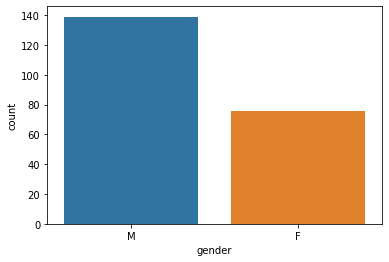

Central    116
Others      99
Name: ssc_b, dtype: int64


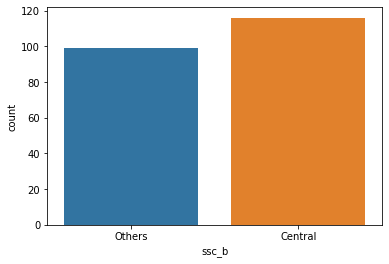

Others     131
Central     84
Name: hsc_b, dtype: int64


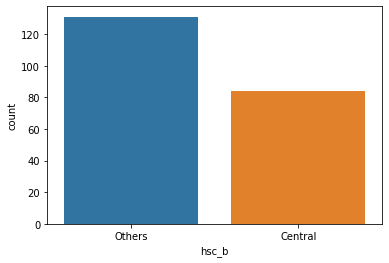

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64


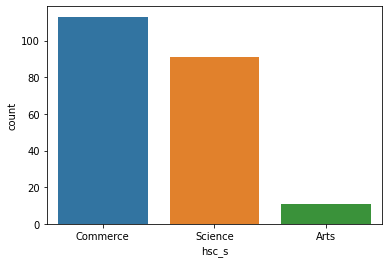

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64


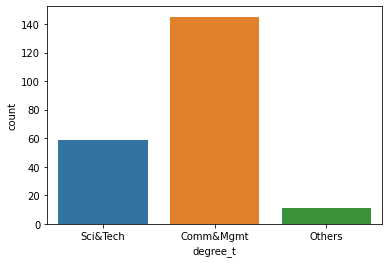

No     141
Yes     74
Name: workex, dtype: int64


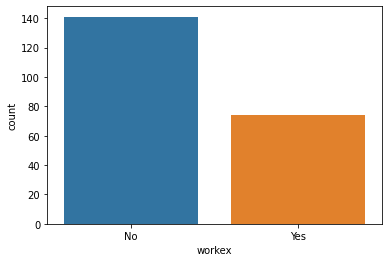

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64


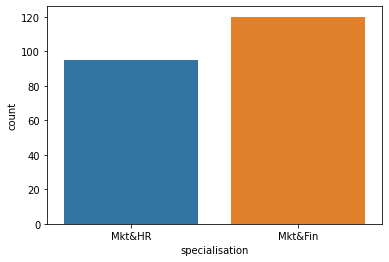

Placed        148
Not Placed     67
Name: status, dtype: int64


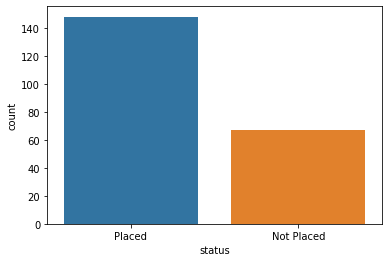

In [8]:
## Visualisation using countplot
for col in cat:
    print(df[col].value_counts())
    sns.countplot(df[col])
    plt.show()

## Comparing gender, work experience and specialisation with status.

#### 1. Gender
100 out of 139 males were placed and 48 out of 76 females were placed.

In [9]:
male_pct = round((100/139) * 100, 2)
female_pct = round((48/76) * 100, 2)
print(f"Male placement percentage: {male_pct}%")
print(f"Female placement percentage: {female_pct}%")

Male placement percentage: 71.94%
Female placement percentage: 63.16%


#### 2. Work experience
64 out of 74 who had workex were placed and 84 out of 141 who didn't have workex were placed.

In [10]:
y = round((64/74) * 100, 2)
n = round((84/141) * 100, 2)
print(f"Percentage of students with workex who got placed: {y}%")
print(f"Percentage of students without workex who got placed: {n}%")

Percentage of students with workex who got placed: 86.49%
Percentage of students without workex who got placed: 59.57%


#### 3. Specialisation
53 out of 95 in Mkt&HR got placed and 95 out of 120 in Mkt&Fin got placed

In [11]:
hr = round((53/95) * 100, 2)
fin = round((95/120) * 100, 2)
print(f"Percentage of students in Mkt&HR who got placed: {hr}%")
print(f"Percentage of students in Mkt&Fin who got placed: {fin}%")

Percentage of students in Mkt&HR who got placed: 55.79%
Percentage of students in Mkt&Fin who got placed: 79.17%


## Finding correlations between ssc_p, hsc_p, degree_p and mba_p

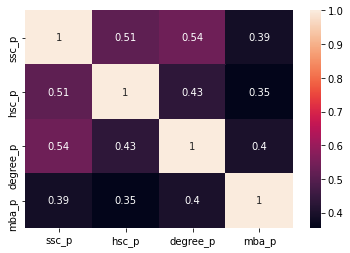

In [12]:
pct = df[['ssc_p', 'hsc_p', 'degree_p', 'mba_p']]
sns.heatmap(pct.corr(), annot=True)

Here degree_p has highest correlation with respect to mba_p followed by hsc_p.

## Visualising mba percentage vs. employability test percentage with respect to their status

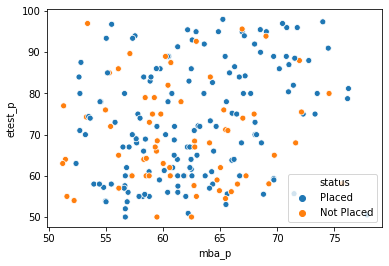

In [13]:
sns.scatterplot(x='mba_p', y='etest_p', data=df, hue='status')

### The interesting thing here is that even after getting higher percentage in MBA and the employability test, students were not placed.